In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
from glob import iglob
import pprint
import numpy as np
from collections import OrderedDict
import csv

In [92]:
# filepath to CSB files downloaded on April 30
filepath = ("./*.csv")

In [93]:
# combine all 2009-2019 CSB complaint files into one file
interesting_files = glob.glob(filepath)

header_saved = False
with open('csb_master.csv','wb') as fout:
    for filename in interesting_files:
        with open(filename) as fin:
            header = next(fin)
            if not header_saved:
                fout.write(header)
                header_saved = True
            for line in fin:
                fout.write(line)

In [94]:
# read the csb_master.csv file you just created into a dataframe, and each year into its own dataframe
total = pd.read_csv('csb_master.csv', dtype=dtypes)
year_2009 = pd.read_csv('./2009.csv')
year_2010 = pd.read_csv('./2010.csv')
year_2011 = pd.read_csv('./2011.csv')
year_2012 = pd.read_csv('./2012.csv')
year_2013 = pd.read_csv('./2013.csv')
year_2014 = pd.read_csv('./2014.csv')
year_2015 = pd.read_csv('./2015.csv')
year_2016 = pd.read_csv('./2016.csv')
year_2017 = pd.read_csv('./2017.csv')
year_2018 = pd.read_csv('./2018.csv')
year_2019 = pd.read_csv('./2019.csv')

In [95]:
# assuring the data got read into the dataframe; checking out the data
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159888 entries, 0 to 1159887
Data columns (total 19 columns):
CALLERTYPE         604212 non-null object
DATECANCELLED      31362 non-null object
DATEINVTDONE       1114116 non-null object
DATETIMECLOSED     1100744 non-null object
DATETIMEINIT       1159888 non-null object
DESCRIPTION        1159880 non-null object
NEIGHBORHOOD       1098534 non-null object
PRJCOMPLETEDATE    1144802 non-null object
PROBADDRESS        1156310 non-null object
PROBADDTYPE        1159888 non-null object
PROBCITY           298659 non-null object
PROBLEMCODE        1159888 non-null object
PROBZIP            276513 non-null object
REQUESTID          1159888 non-null object
SRX                1126255 non-null object
SRY                1126259 non-null object
STATUS             1159732 non-null object
SUBMITTO           1159681 non-null object
WARD               1104422 non-null object
dtypes: object(19)
memory usage: 168.1+ MB


In [96]:
# here are the problem codes we want to filter by
playground = ['Playground Equipment']
misc_parks = ['Misc-Parks Div']
trash = ['Trash in the Park']
potty = ['Park Restrooms']
fields = ['Athletic Fields']
grass = ['High Grass in Park']
sewer = ['Park Sewer Problem']
picnic = ['Clean Picnic Tables']

In [97]:
# years 2009-2019, filtered to only playground equipment complaints, and printing total over all years
playground_total = total.loc[total['PROBLEMCODE'].isin(playground)]
playground_total['DATETIMEINIT'].count()

410

In [98]:
# playground equipment complaints for 2009-2019 sorted by year
playground_total['YEAR'] = pd.DatetimeIndex(playground_total['DATETIMEINIT']).year
x = playground_total['YEAR'].groupby(playground_total.YEAR).agg('count')
print x

YEAR
2009    28
2010    28
2011    36
2012    35
2013    48
2014    36
2015    27
2016    55
2017    65
2018    50
2019     2
Name: YEAR, dtype: int64


Text(0,0.5,'Number of complaints')

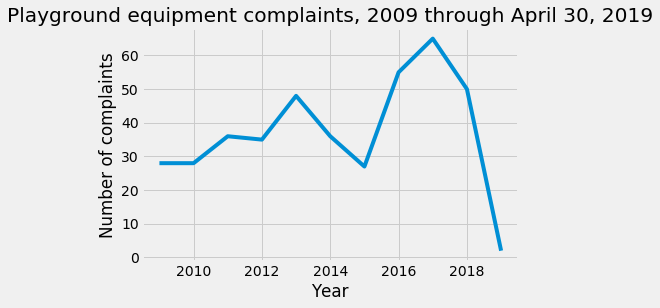

In [99]:
# playground equipment complaints on a simple graph
# NOTE: 2019 data goes through the end of April
plt.style.use('fivethirtyeight')
plt.plot(x)
plt.title("Playground equipment complaints, 2009 through April 30, 2019")
plt.xlabel("Year")
plt.ylabel("Number of complaints")

In [54]:
# filtering the 2018 dataframe down to each specific problem code
misc_parks_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(misc_parks)]
misc_parks_2018['DATETIMEINIT'].count()

107

In [55]:
trash_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(trash)]
trash_2018['DATETIMEINIT'].count()

106

In [72]:
potty_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(potty)]
a = potty_2018['DATETIMEINIT'].count()
print a

24


In [73]:
fields_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(fields)]
b = fields_2018['DATETIMEINIT'].count()
print b

18


In [74]:
grass_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(grass)]
c = grass_2018['DATETIMEINIT'].count()
print c

171


In [75]:
sewer_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(sewer)]
d = sewer_2018['DATETIMEINIT'].count()
print d

9


In [76]:
picnic_2018 = year_2018.loc[year_2018['PROBLEMCODE'].isin(picnic)]
e = picnic_2018['DATETIMEINIT'].count()
print e

4


In [77]:
all_other_park_complaints = a + b + c + d + e
print all_other_park_complaints

226
